In [3]:
Threads.nthreads()=1

In [36]:
# using Revise
using WordCloud
using Random
using BenchmarkTools

Random.seed!(148)
words = [randstring(rand(1:8)) for i in 1:500]
weights = randexp(length(words))
wc = wordcloud(words, weights);

color scheme: :RdPu_4, length: 4
angles = (0, 90, 45, -45)
shape(squircle, 1108, 751, rt=0.956, color=0.0, padding=81)
font = "Helvetica"
mask size: 913×1270, content area: 814² (36²/word)
set fontsize ∈ [8.0, 456.5]
set density = 0.5
⋯scale=38.360193488099675, density=0.4672092075047146	↓
⋯scale=39.6835114870467, density=0.4963031990553284	↓
fontsize ∈ [8.0, 89.17574472897041]
222 words(44%) are limited to the minimum font size.


In [24]:
qts = wc.qtrees;
QTrees = WordCloud.Stuffing.QTrees

Stuffing.QTrees

In [9]:
using StatsBase

In [51]:
@show Threads.nthreads()=12
n = 40
samples = [StatsBase.sample(1:500, n, replace=false) for i in 1:1000]
bn = @benchmark for inds in samples
    QTrees.batchcollisions_native(qts, inds)
end
display(bn)
br = @benchmark for inds in samples
    QTrees.batchcollisions_region(qts, inds, unique=false)
end
display(br)
@show mean(bn.times), mean(br.times)
mean(bn.times)>mean(br.times) ? "region" : "native"

BenchmarkTools.Trial: 86 samples with 1 evaluation.
 Range (min … max):  51.383 ms … 79.319 ms  ┊ GC (min … max): 0.00% … 4.37%
 Time  (median):     58.262 ms              ┊ GC (median):    5.91%
 Time  (mean ± σ):   58.737 ms ±  3.823 ms  ┊ GC (mean ± σ):  3.39% ± 2.90%

                 ▂ ▂      ▂█  ▂    ▆                           
  ▄▁▁▁▆▁▄▁▄▁▁█▄▆▄█▄█▄██▆█▄███▆█▄▄█▆█▄█▆▄▁▆▁▄▄▁▄▁▄▁▁▆▁▁▆▁▁▁▁▁▄ ▁
  51.4 ms         Histogram: frequency by time        67.3 ms <

 Memory estimate: 53.26 MiB, allocs estimate: 143590.

BenchmarkTools.Trial: 84 samples with 1 evaluation.
 Range (min … max):  52.140 ms … 99.643 ms  ┊ GC (min … max): 0.00% … 7.94%
 Time  (median):     58.701 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   60.189 ms ±  8.305 ms  ┊ GC (mean ± σ):  5.61% ± 6.25%

   ▅▃█           ▃                                             
  ████▇▆▅▃▁▅▅▅██▇█▇▆▃▃▁▁▁▁▃▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃ ▁
  52.1 ms         Histogram: frequency by time        97.1 ms <

 Memory estimate: 39.39 MiB, allocs estimate: 343413.

Threads.nthreads() = begin
        #= In[51]:1 =#
        12
    end = nothing
(mean(bn.times), mean(br.times)) = (5.873747434883721e7, 6.018935621428572e7)


"native"

In [68]:
R = []
TH = 1:12
SP = 1:40
for th in TH
    display("TH$th")
    nat = []
    reg = []
    Threads.nthreads()=th
    for n in SP
        samples = [StatsBase.sample(1:500, n, replace=false) for i in 1:1000]
        bn = @benchmark for inds in samples
            QTrees.batchcollisions_native(qts, inds)
        end
        br = @benchmark for inds in samples
            QTrees.batchcollisions_region(qts, inds, unique=false)
        end
        push!(nat, mean(bn.times))
        push!(reg, mean(br.times))
    end
    push!(R, (nat, reg))
end

"TH1"

"TH2"

"TH3"

"TH4"

"TH5"

"TH6"

"TH7"

"TH8"

"TH9"

"TH10"

"TH11"

"TH12"

In [69]:
using Plots

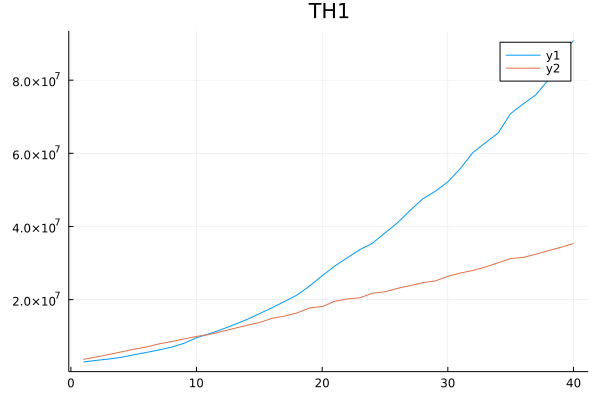

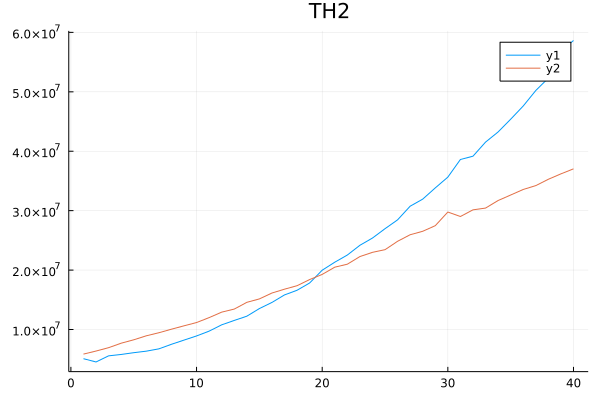

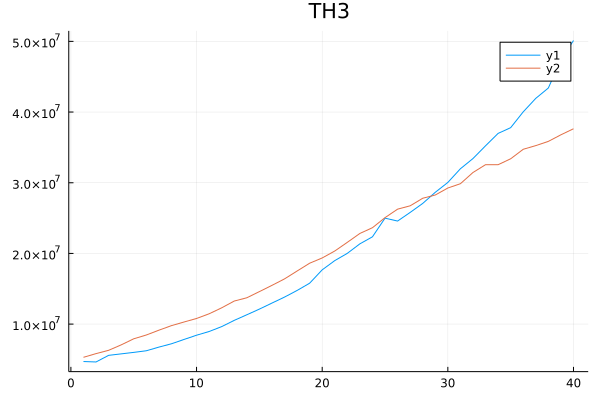

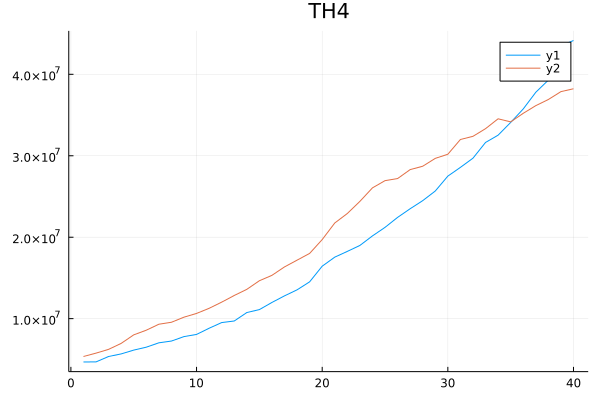

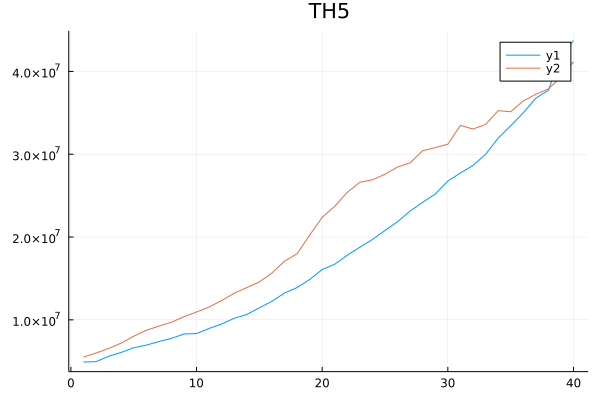

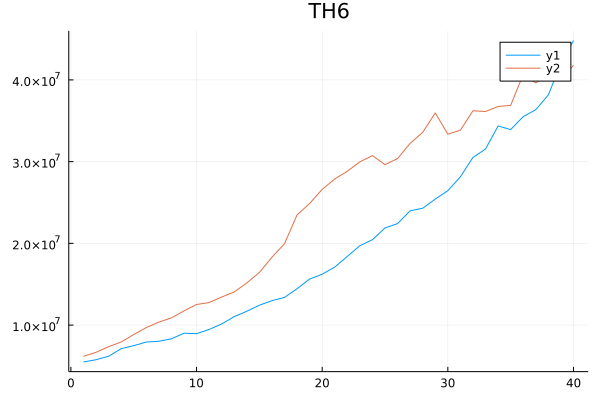

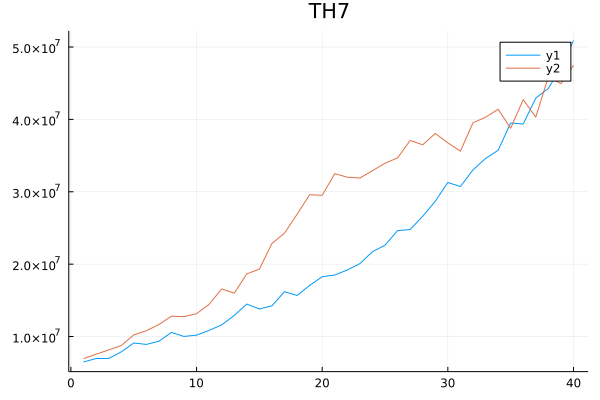

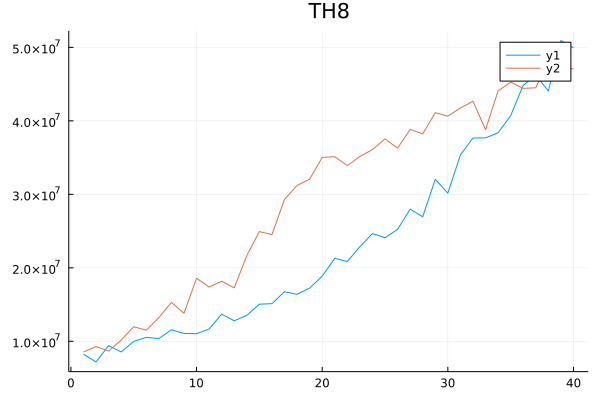

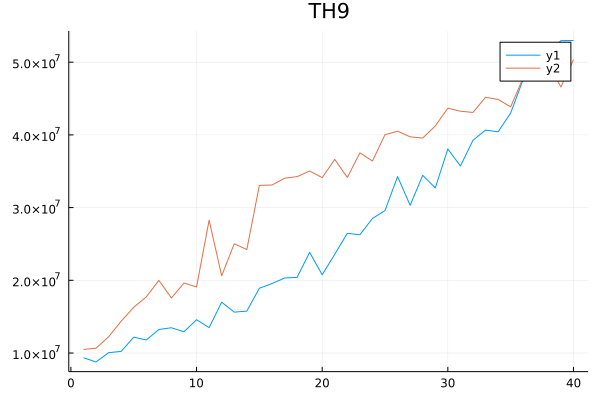

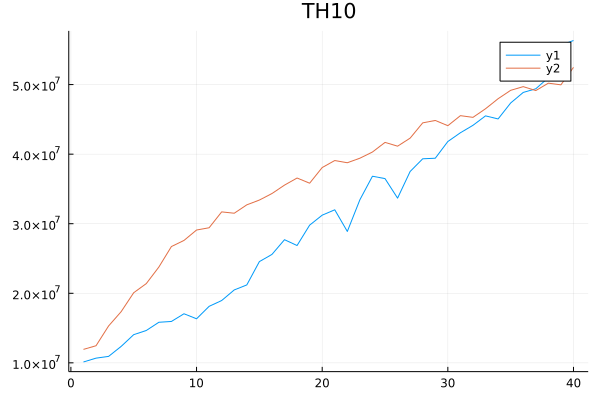

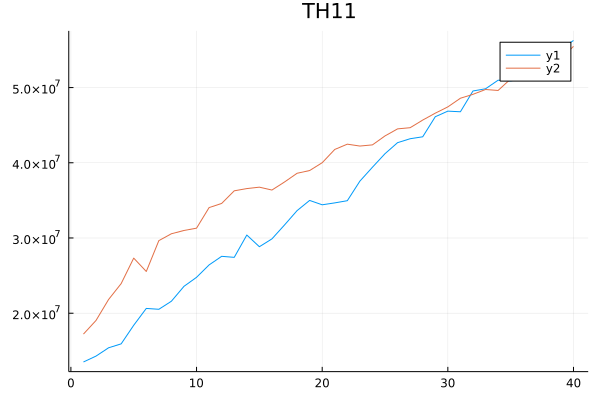

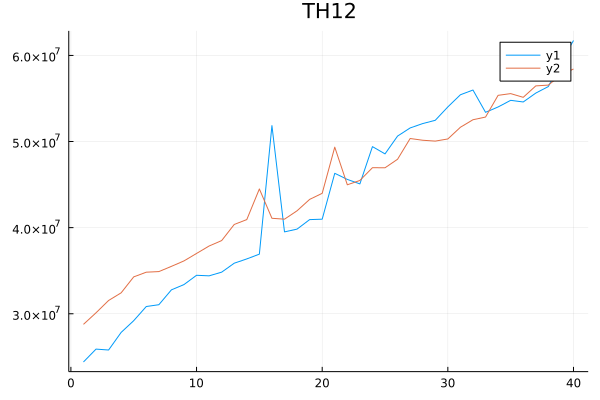

In [70]:
for th in TH
    nat, reg = R[th]
    plot(SP, nat)
    plot!(SP, reg) 
    title!("TH$th")|> display
end

12-element Vector{Any}:
 10
 19
 28
 35
 38
 38
 38
 38
 37
 36
 37
 38

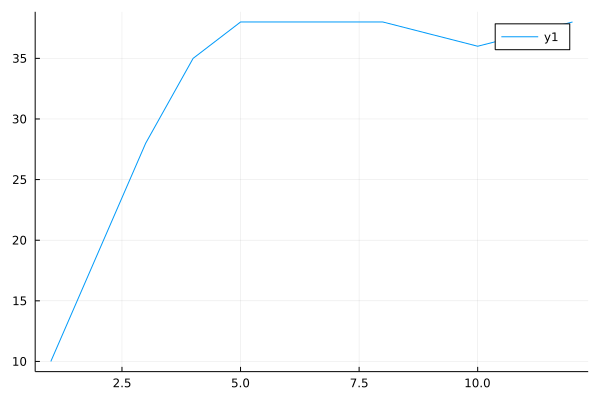

In [81]:
C = []
for th in TH
    nat, reg = R[th]
    ci = findlast(i->nat[i]<reg[i],1:40)
    push!(C, ci)
end
display(C)
p = plot(C)

In [99]:
println(Int.(C))
println([round(Int, 10+10log2(th)) for th in 1:12])

[10, 19, 28, 35, 38, 38, 38, 38, 37, 36, 37, 38]
[10, 20, 26, 30, 33, 36, 38, 40, 42, 43, 45, 46]
